In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book=pd.read_csv("C:/booknew.csv")

In [3]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
book.shape

(2000, 11)

In [5]:
#Apriori Algorithm
#Using min_support as 0.1
frequent_items=apriori(book,min_support=0.1,use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [6]:
rules=association_rules(frequent_items,metric="lift",min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [7]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [8]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [9]:
rules_new=association_rules(frequent_items,metric="confidence",min_threshold=0.6)
rules_new

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [10]:
#Using min_support as 0.2
frequent_items2=apriori(book,min_support=0.2,use_colnames=True)
frequent_items2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [11]:
rules2=association_rules(frequent_items2,metric="lift",min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [12]:
#Using min support as 0.3
frequent_items3=apriori(book,min_support=0.3,use_colnames=True)
frequent_items3

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [13]:
rules3=association_rules(frequent_items3,metric="lift",min_threshold=0.6)
rules3
#No more rules form on support value 0.3 and more
#No.of rules reduces as we increase support value

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [14]:
#To change length
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,1
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,2
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,1
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,1


In [15]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.6) &
       (rules['lift'] > 2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2
84,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626,2
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2


In [16]:
#Rules Visualization
import matplotlib.pyplot as plt

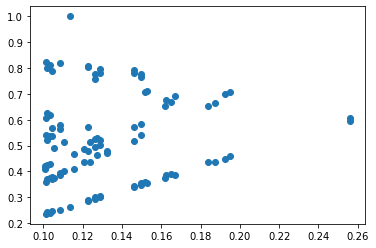

In [17]:
plt.scatter(rules.support,rules.confidence)

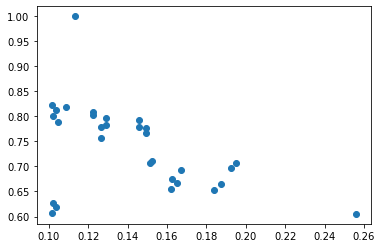

In [23]:
plt.scatter(rules_new.support,rules_new.confidence)

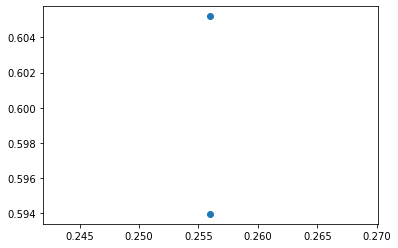

In [18]:
plt.scatter(rules2.support,rules2.confidence)

(array([40., 24.,  8., 14.,  4.,  6.,  2.,  0.,  0.,  2.]),
 array([0.101 , 0.1165, 0.132 , 0.1475, 0.163 , 0.1785, 0.194 , 0.2095,
        0.225 , 0.2405, 0.256 ]),
 <BarContainer object of 10 artists>)

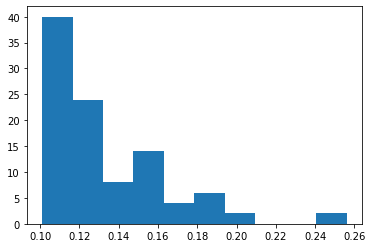

In [19]:
#Rule-1 histogram
plt.hist(rules.support)

(array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
 array([-0.244, -0.144, -0.044,  0.056,  0.156,  0.256,  0.356,  0.456,
         0.556,  0.656,  0.756]),
 <BarContainer object of 10 artists>)

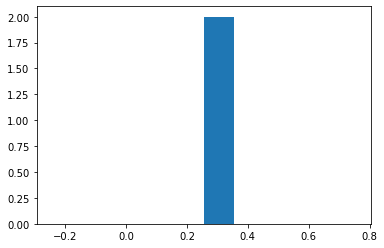

In [20]:
#Rule-2 histogram
plt.hist(rules2.support)

{'whiskers': [<matplotlib.lines.Line2D at 0x218708b4e20>,
 'caps': [<matplotlib.lines.Line2D at 0x218708c3520>,
 'boxes': [<matplotlib.lines.Line2D at 0x218708b4ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x218708c3be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x218708c3f40>],
 'means': []}

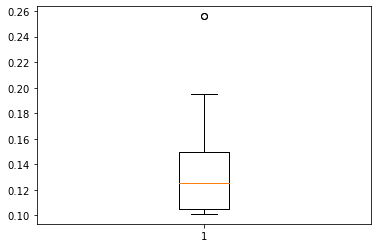

In [21]:
plt.boxplot(rules['support'],vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21870914c40>,
 'caps': [<matplotlib.lines.Line2D at 0x21870920340>,
 'boxes': [<matplotlib.lines.Line2D at 0x218709148e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21870920a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21870920d90>],
 'means': []}

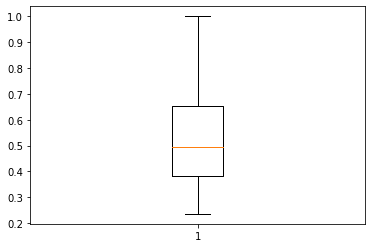

In [22]:
plt.boxplot(rules['confidence'],vert = True)